In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [7]:
# matplolib deafaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, figsize = (8,4))
plt.rc('axes', titlesize = 10, titleweight = 'bold', titlepad = 10, labelsize = 10, labelweight = 'bold')


In [8]:
data_dir = Path("../input/fe-course-data")
df = pd.read_csv(data_dir / "movielens1m.csv")
df.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4


In [10]:
# finding the missing values
df.isnull().sum()

Movie ID              0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
Unknown               0
War                   0
Western               0
(no genres listed)    0
User ID               0
Age                   0
Gender                0
Occupation            0
Zipcode               0
Rating                0
dtype: int64

In [11]:
df.shape

(1000209, 28)

In [13]:
df = df.astype(np.uint8, errors='ignore') #reduce memoru footprint
print(f"Number of Unique Zipcodes: {df['Zipcode'].nunique()}")

Number of Unique Zipcodes: 3439


In [31]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac = 0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [28]:
X.shape

(1000209, 27)

In [29]:
y.shape

(1000209,)

In [23]:
X_encode.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
40286,b'2694',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'3416',25,1,12,b'20850'
704622,b'34',0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,b'3905',25,1,18,b'361069'
503717,b'1968',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'3769',25,1,15,b'02446'
430072,b'2640',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'58',25,1,1,b'30303'
263904,b'2628',1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,b'5797',25,1,6,b'78757'


In [27]:
X_encode.shape

(250052, 27)

In [24]:
y_encode.head()

40286     2
704622    4
503717    4
430072    4
263904    2
Name: Rating, dtype: uint8

In [21]:
X_pretrain.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,b'50021'
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,b'60073'
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,b'15217'
5,b'2042',0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,b'4957',25,1,1,b'48197'


In [26]:
y_train.head()

0    5
1    4
2    1
3    5
5    2
Name: Rating, dtype: uint8

In [32]:
from category_encoders import MEstimateEncoder

# create a encoder instance and control the noise
encoder = MEstimateEncoder(cols = 'Zipcode',m=5.0)

# filter the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the ZIpcode column to create the final training data
X_train = encoder.transform(X_pretrain)

In [36]:
encoder

MEstimateEncoder(cols=['Zipcode'], m=5.0)

In [34]:
X_train.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,3.644119
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,3.060512
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,3.537852
5,b'2042',0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,b'4957',25,1,1,3.260798
7,b'3334',0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,b'2064',35,1,0,3.735011


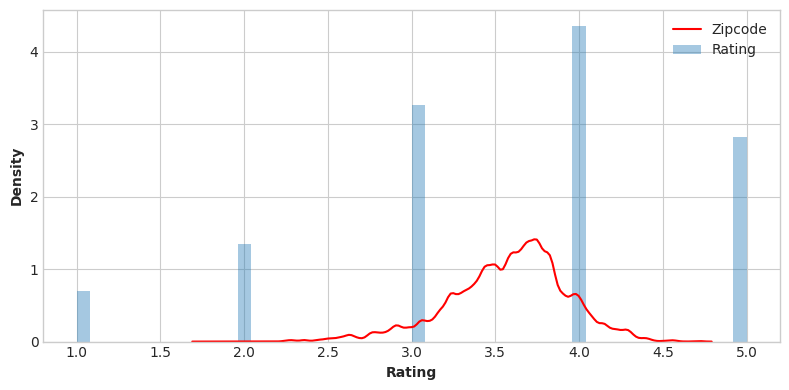

In [43]:
plt.figure(dpi=100)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);